# Chapter 4: Minimum spanning trees

Joke Ampe - 2nd Master in Bio-informatics

In this chapter we will continue to study algorithms that process graphs. We will implement Kruskal's algorithm to construct the **minimum spanning tree** of a graph, a subgraph that efficiently connects all nodes.

## Trees in python

A tree is an undirected graph where any two edges are connected by **exactly one path**. For example, consider the tree below.

![A simple tree](Figures/example_tree.png)

We can represent in python using dictionaries, as we did in the last chapter.

In [1]:
tree_dict = {'A' : set(['D']), 'B' : set(['D']), 'C' : set(['D']),
             'D' : set(['A', 'B', 'C', 'E']), 'E' : set(['D', 'F']), 'F' : set(['E'])}

Though in this chapter, we prefer to represent the tree as a list (set) of links:

In [2]:
tree_links = [(node, neighbor) for node in tree_dict.keys() for neighbor in tree_dict[node]]
tree_links

[('A', 'D'),
 ('B', 'D'),
 ('C', 'D'),
 ('D', 'B'),
 ('D', 'C'),
 ('D', 'A'),
 ('D', 'E'),
 ('E', 'F'),
 ('E', 'D'),
 ('F', 'E')]

If we choose one node as the **root** of the tree, we have exactly one path from this root to each of the other terminal nodes. This idea can applied recursively as follows: from this root, each neighboring is itself a root of a subtree. Each of these subtrees also consist of a root and possibly one or more subtrees. Hence we can also represent the tree as a nested sublist:

```
tree = [root, [subtree1], [subtree2],...]
```

For our example, we obtain when taking node D as a root: (see [here](http://interactivepython.org/courselib/static/pythonds/Trees/ListofListsRepresentation.html))

In [3]:
tree_list = ['D', ['A'], ['B'], ['C'], ['E', ['F']]]

## Minimum spanning tree

Suppose we have an undirected connected weighted graph $G$ as depicted below.

![A weighted graph](Figures/graph.png)

Weighted graphs can either be implemented as a set of weighted edges of as a dictionary.

In [4]:
vertices = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

edges = set([(5, 'A', 'D'), (7, 'A', 'B'), (8, 'B', 'C'), (9, 'B', 'D'),
         (7, 'B', 'E'), (5, 'C', 'E'), (15, 'D', 'E'), (6, 'F', 'D'), 
        (8, 'F', 'E'), (9, 'E', 'G'), (11, 'F', 'G')])

In [5]:
weighted_adj_list = {v : set([]) for v in vertices}

for weight, vertex1, vertex2 in edges:
    weighted_adj_list[vertex1].add((weight, vertex2))
    weighted_adj_list[vertex2].add((weight, vertex1))  # undirected graph, in=outgoing edge

weighted_adj_list

{'A': {(5, 'D'), (7, 'B')},
 'B': {(7, 'A'), (7, 'E'), (8, 'C'), (9, 'D')},
 'C': {(5, 'E'), (8, 'B')},
 'D': {(5, 'A'), (6, 'F'), (9, 'B'), (15, 'E')},
 'E': {(5, 'C'), (7, 'B'), (8, 'F'), (9, 'G'), (15, 'D')},
 'F': {(6, 'D'), (8, 'E'), (11, 'G')},
 'G': {(9, 'E'), (11, 'F')}}

For example, the nodes may represent cities and the weight of an edge may represent the cost of implementing a communication line between two cities. If we want to make communication possible between all cities, these should be a path between any two cities. A **spanning tree** is a subgraph of $G$ that is a tree which contains all nodes of $G$. The cost of the spanning tree is simply the sum of a the weights of the edges in this tree. Often, multiple spanning trees can be chosen from a connected graph. The **minimum spanning tree** is simply the spanning tree with the lowest cost.

The figure below shows the minimum spanning tree for $G$ in green.

![A weighted graph](Figures/min_spanning_tree.png)

Minimum spanning trees have many applications:
- design of computer-, telecommunication-, transportation- and other networks
- hierachical clustering
- image segmentation and feature extraction
- phylogenetic analysis
- construction of mazes

## Disjoint-set data structure

Implementing an algorithm for finding the minimum spanning tree is fairly straightforward. The only bottleneck is that the algorithm requires the a **disjoint-set data structure** to keep track of a set partitioned in a number of disjoined subsets.

For example, consider the following inital set of eight elements.

![A set of eight elements](Figures/disjointset1.png)

We decide to group elements A, B and C together in a subset and F and G in another subset.

![The same set, but after grouping some elements together.](Figures/disjointset2.png)

The disjoint-set data structure support the following operations:
- **Find** check which subset an element is in. Is typically used to check whether two objects are in the same subset.
- **Union** to merge two subsets into a single subset.

A python implementation of a disjoint-set is available using an union-set forest. A simple example will make everything clear!

In [6]:
from union_set_forest import USF

animals = ['mouse', 'bat', 'robin', 'trout', 'seagull', 'hummingbird',
           'salmon', 'goldfish', 'hippopotamus', 'whale', 'sparrow']
union_set_forest = USF(animals)

# group mammals together
union_set_forest.union('mouse', 'bat')
union_set_forest.union('mouse', 'hippopotamus')
union_set_forest.union('whale', 'bat')

# group birds together
union_set_forest.union('robin', 'seagull')
union_set_forest.union('seagull', 'sparrow')
union_set_forest.union('seagull', 'hummingbird')
union_set_forest.union('robin', 'hummingbird')

# group fishes together
union_set_forest.union('goldfish', 'salmon')
union_set_forest.union('trout', 'salmon')

In [7]:
# mouse and whale in same subset?
print(union_set_forest.find('mouse') == union_set_forest.find('whale'))

True


In [8]:
# robin and salmon in the same subset?
print(union_set_forest.find('robin') == union_set_forest.find('salmon'))

False


## Kruskal's algorithm

Kruskal's algorithm is a very simple algorithm to find the minimum spanning tree. The main idea is to start with an intial 'forest' of the induvidual nodes of the graph. In each step of the algorithm we add an edge with the smallest possible value that connects two disjoints trees in the forest. This process is continued until we have a single tree, which is a minimum spanning tree, or until all edges are considered. In the former case the algoritm returns the minimum spanning forest. 

### Example run of Kruskal's algorithm

Consider the weighted graph again.

![A weighted graph](Figures/graph.png)

In a first step, the algorithm selects the edge with the lowest weight, here connecting nodes A and D. This edge has a weight of 5.

![The first edge with lowest weight is selected.](Figures/K1.png)



The next edge that is selected connects nodes C and E. This edge also has a weight of 5.

![The second edge is selected.](Figures/K2.png)

The edge between D and F is subsequently selected.

![A third edge is added to the forest.](Figures/K3.png)



In the current forest, the edge between B and D becomes inaccessible. Taking this edge would result in a cycle in our graph (B and D are already connected through A in our forest), so it is forbidden.

![Now edge BD becomes forbidden, because adding it to our forest would result in a cycle.](Figures/K4.png)


The next allowd edge with the lowest weight is between nodes B and E. Taking this edges connects two independent components in our forest and makes other edges forbidden.

![We add edge BD, connecting two components in our forest.](Figures/K5.png)


Finally, edge EG connects the last node G to our tree with the lowest cost.

![Adding edge EG results in the minimum spanning tree.](Figures/K6.png)

### Pseudocode of Kruskal's algorithm

```
function Kruskal(G):
1 A := empty list
2 for each node v in G
3    MAKE-SET(v)
4 for each edge (u, v) ordered by weight(u, v), increasing:
5    if FIND-SET(u) ≠ FIND-SET(v):
6       add (u, v) to A
7       UNION(u, v)
8 return A
```

### Time complexity of Kruskal's algorithm

We assume that by using a disjoint set data structure, ```FIND``` and ```UNION``` can be performed using a time complexity of $\mathcal{O}(1)$. Then the only cost is in sorting the edges by their weight, which can be done with a time complexity of $\mathcal{O}(|E| \log(|E|))$, which is the time complexity of generating the minimum spanning tree using this algorithm.

**Assignment 1: completing Kruskal's algorithm**

1. Complete the code for Kruskals algorithm below. Test the code on the example network given above.
2. Ticket to Ride is a fun boardgame in which you have to connect trains to several important cities in the United States. Load the vertices (cities) and edges (roads) from the file `ticket_to_ride.py`. Compute a minimum spanning tree.

![The map of Ticket to Ride.](Figures/TtRmap.jpg)

In [9]:
def kruskal(vertices, edges):
    """
    Kruskal's algorithm for finding a minimum spanning tree
    Input :
        - vertices : a set of the vertices of the graph
        - edges : a list of weighted edges (e.g. (0.7, 'A', 'B')) for an
                    edge from node A to node B with weigth 0.7
    Output:
        a minumum spanning tree represented as a list of edges
    """        
    # sort the edges
    sorted_edges = sorted(edges)
    # keep track of the used edges
    minimum_tree = set([])
    cost = 0
    forest = set(vertices)
    USF_forest = USF(forest)
    for (w, u, v) in sorted_edges:
        if USF_forest.find(u) != USF_forest.find(v):
            minimum_tree.add((u, v))
            cost += w
            USF_forest.union(u, v)
    return list(minimum_tree), cost

In [10]:
vertices = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
edges = [(5, 'A', 'D'), (7, 'A', 'B'), (8, 'B', 'C'), (9, 'B', 'D'),
         (7, 'B', 'E'), (5, 'C', 'E'), (15, 'D', 'E'), (6, 'F', 'D'), 
        (8, 'F', 'E'), (9, 'E', 'G'), (11, 'F', 'G')]
print('The optimal solution is: ',kruskal(vertices, edges))

The optimal solution is:  ([('E', 'G'), ('A', 'B'), ('C', 'E'), ('A', 'D'), ('B', 'E'), ('F', 'D')], 39)


In [11]:
from ticket_to_ride import vertices as cities
from ticket_to_ride import edges as roads

In [12]:
print(cities)

print(roads)
    
# city corresponds the vertices in the kruskal implementation
# roads corresponds to the edges in the kruskal implementation

['Atlanta', 'Boston', 'Calgary', 'Charleston', 'Chicago', 'Dallas', 'Denver', 'Duluth', 'El Paso', 'Helena', 'Houston', 'Kansas City', 'Las Vegas', 'Little Rock', 'Los Angeles', 'Miami', 'Montreal', 'Nashville', 'New Orleans', 'New York', 'Oklahoma City', 'Omaha', 'Phoenix', 'Pittsburgh', 'Portland', 'Raleigh', 'Saint Louis', 'Salt Lake City', 'San Francisco', 'Santa Fe', 'Sault St. Marie', 'Seattle', 'Toronto', 'Vancouver', 'Washington DC', 'Winnipeg']
[(5, 'Miami', 'Atlanta'), (4, 'Denver', 'Oklahoma City'), (5, 'Pittsburgh', 'Saint Louis'), (3, 'Montreal', 'New York'), (3, 'El Paso', 'Phoenix'), (1, 'Houston', 'Dallas'), (2, 'Kansas City', 'Saint Louis'), (3, 'Salt Lake City', 'Las Vegas'), (4, 'Omaha', 'Chicago'), (2, 'Denver', 'Santa Fe'), (3, 'Pittsburgh', 'Chicago'), (4, 'Denver', 'Omaha'), (6, 'Sault St. Marie', 'Winnipeg'), (2, 'Kansas City', 'Oklahoma City'), (2, 'Oklahoma City', 'Kansas City'), (2, 'Little Rock', 'Dallas'), (4, 'Denver', 'Kansas City'), (5, 'Oklahoma City', 

In [13]:
# compute here the MST for Ticket to Ride
print('The optimal solution is: ',kruskal(cities, roads))

The optimal solution is:  ([('Duluth', 'Winnipeg'), ('Sault St. Marie', 'Toronto'), ('New York', 'Washington DC'), ('Denver', 'Salt Lake City'), ('Atlanta', 'Nashville'), ('Boston', 'New York'), ('Los Angeles', 'San Francisco'), ('Nashville', 'Saint Louis'), ('Boston', 'Montreal'), ('Portland', 'Seattle'), ('Atlanta', 'Charleston'), ('Dallas', 'Houston'), ('El Paso', 'Santa Fe'), ('Duluth', 'Omaha'), ('Houston', 'New Orleans'), ('New York', 'Pittsburgh'), ('Dallas', 'El Paso'), ('Denver', 'Helena'), ('Seattle', 'Vancouver'), ('Chicago', 'Saint Louis'), ('Los Angeles', 'Phoenix'), ('Dallas', 'Oklahoma City'), ('Kansas City', 'Saint Louis'), ('Las Vegas', 'Los Angeles'), ('Kansas City', 'Omaha'), ('Kansas City', 'Oklahoma City'), ('Dallas', 'Little Rock'), ('Charleston', 'Miami'), ('Denver', 'Santa Fe'), ('Calgary', 'Vancouver'), ('Calgary', 'Helena'), ('El Paso', 'Phoenix'), ('Duluth', 'Sault St. Marie'), ('Charleston', 'Raleigh'), ('Raleigh', 'Washington DC')], 79)


## The travelling salesman problem

The traveling salesman problem is a well-known problem in computer science. The goal is to find a tour in a graph with a minimal cost. This problem is NP-hard, there is no algorithm to solve this efficiently for large graphs.

The tour is represented as a dictionary, for each key-value pair a vertex and the associated next vertex in the tour.

Below are two heuristic algorithms to find a good tour.

### Nearest Neighbour

The simplest algorithm, can be done in with a time complexity of $\mathcal{O}(|V|^2)$.

1. Select a random vertex.
2. Find the nearest univisited vertex and add it to the path.
3. Are there any unvisited vertices left? If yes, repeat step 2.
4. Return to the first vertex.

### Greedy

A greedy algorithm that gives a solution in $\mathcal{O}(|V|^2\log(|V|))$ time.

1. Sort all edges
2. Select the shortest edge and add it to the tour if it does not:
    - creates a tour with less than $|V|$ vertices 
    - increases the degree of any of the vertices in the tour to more than two.
3. Repeat step 2 until the tour has $|V|$ vertices.

**Assignment 2**

1. Complete the functions `nearest_neighbour_tsa` and `greedy_tsa`. 
2. We have two benchmarks problems, one with 29 and one with 225 cities. For each problem the graph and coordinates of the cities are given. Give the **found optimal cost** and **running time** for the two algorithms.
3. Make a plot of the best tour for each of the two benchmarks.
4. Discuss how you can see on such a plot if the tour is optimal.

In [45]:
def nearest_neighbour_tsa(graph, start='random'):
    import random
    """
    Nearest Neighbour heuristic for the travelling salesman problem
    
    Inputs:
        - graph: the graph as an adjacency list
        - start: the vertex to start
        
    Outputs:
        - tour: the tour as a dictionary
        - tour_cost: the cost of the tour
    
    """
    tour = {}
    unvisited_cities = list(graph.keys())
    
    # Select a random vertex if no start is given.
    if start == 'random':
        start = random.sample(graph.keys(), 1)[0]
    unvisited_cities.remove(start)
    current = start
    
    # Keep track of the cost
    tour_cost = 0
    
    # Until no more unvisited vertices are left.
    while unvisited_cities != []:
        # Find the nearest unvisited vertex and add it to the path.
        sorted_neighbours = sorted(graph[current], key=lambda tup: tup[0])
        for neighbour in sorted_neighbours:
            if neighbour[1] in unvisited_cities:
                tour[current] = neighbour[1]
                tour_cost += neighbour[0]
                unvisited_cities.remove(neighbour[1])
                current = neighbour[1]
                break
                
    # Return to the first vertex.
    tour[current] = start
    return tour, tour_cost

In [46]:
def greedy_tsa(graph):
    """
    Greedy heuristic for the travelling salesman problem
    
    Inputs:
        - graph: the graph as an adjacency list
        
    Outputs:
        - tour: the tour as a dictionary
        - tour_cost: the cost of the tour
    
    """
    cities = USF(graph.keys())
    tour = []
    tour_cost = 0
    
    # represent edges as list of tuples to sort easily    
    edges = list()
    for k, v in graph.items():
        for i in v:
            # Make sure they are not double in the list
            if (i[0], i[1], k) not in edges:
                edges.append((i[0], k, i[1]))
    edges = sorted(edges)
    
    # Actual algorithm
    # while there are still unvisited cities
    while len(tour)<((len(graph.keys()))*2)-2:
        # loop over sorted edges    
        for i in edges:
            # If they are not connected yet and the node degree is lower than 2
            if (cities.find(i[1]) != cities.find(i[2])) and (tour.count(i[1])<2) and (tour.count(i[2])<2):
                cities.union(i[1], i[2])
                tour.append(i[1])
                tour.append(i[2])
                tour_cost += i[0]
                edges.remove(i)
                break
            else:
                continue        

    # add the last step
    for i in range(0, len(graph.keys())):
        if tour.count(i)<2:
            tour.append(i)
    
    # make it a dictionary and a tour
    # now there are just edges, not in the right order 
    tour_dict = {}
    sources = tour[::2]
    targets = tour[1::2]
    index = 0
    while len(sources)>0:
        key = sources[index]
        value = targets[index]
        tour_dict[key] = value
        del sources[index]
        del targets[index]
        # find the new source in either of the two lists (sources or targets)
        if value in sources and len(sources) > 0:
            index = sources.index(value)
        elif len(sources) > 0:
            index = targets.index(value)
            (sources[index], targets[index]) = (targets[index], sources[index])
    
    return tour_dict, tour_cost
            
            

In [23]:
# load coordinates and graph for the two benchmark algorithms
from load_tsa import coordinates29, coordinates225, graph29, graph225

In [47]:
from timeit import Timer

t_NN29 = Timer(lambda: nearest_neighbour_tsa(graph29))

time29NN = t_NN29.timeit(number=10)

t_NN225 = Timer(lambda: nearest_neighbour_tsa(graph225))

time225NN = t_NN225.timeit(number=10)

In [48]:
(path29NN, cost29NN) = nearest_neighbour_tsa(graph29)
(path225NN, cost225NN) = nearest_neighbour_tsa(graph225)

In [49]:
t_gr29 = Timer(lambda: greedy_tsa(graph29))

time29gr = t_gr29.timeit(number=1)

t_gr225 = Timer(lambda: greedy_tsa(graph225))

time225gr = t_gr225.timeit(number=1)

In [50]:
(path29gr, cost29gr) = greedy_tsa(graph29)
(path225gr, cost225gr) = greedy_tsa(graph225)

In [51]:
print("The optimal cost for the nearest neighbour algorithm is", cost29NN, "for the graph with 29 nodes.")
print("For the graph with 225 nodes, it is ",cost225NN)

print("For the greedy algorithm, this is ", cost29gr, "for the 29 node graph and ",cost225gr,"for the 225 node graph.") 


The optimal cost for the nearest neighbour algorithm is 2049.0 for the graph with 29 nodes.
For the graph with 225 nodes, it is  4623.862648
For the greedy algorithm, this is  1971.0 for the 29 node graph and  4305.192289 for the 225 node graph.


For the nearest neighbour algorithm the result for optimal cost is at random since the algorithm can take any of the nodes as starting nodes. We could loop over all the nodes as startnode, but this would take a time n times bigger (with n the number of nodes). As it is also not written like that in the pseudocode, I did not implement this. 

In [52]:
print('The time needed for the nearest neighbour algorithm is', time29NN, 'second for the 29 node graph.')
print('For the 225 node graph it is', time225NN, 'seconds.')
print('The greedy algorithm takes', time29gr, 'seconds for the 29 node graph and', time225gr, 'seconds for the 225 node graph.')


The time needed for the nearest neighbour algorithm is 0.012043093572856378 second for the 29 node graph.
For the 225 node graph it is 0.35530938073043217 seconds.
The greedy algorithm takes 0.018804565838763665 seconds for the 29 node graph and 42.39792791542368 seconds for the 225 node graph.


It shows us that the greedy algorithm is more likely to find the best solution. Or in any case, it finds a local optimal with a lower cost compared to the nearest neighbour algorithm. This happens because in the nearest neighbour algorithm, at each step the algorithm can only choose between edges that start at the current node. The algorithm really starts from one node and creates a circle without allowing previous steps to change. The number of options that we are looking for is thus a lot smaller compared to the greedy algorithm. In the greedy algorithm, we build up a set of edges without forcing any cycle to be followed yet untill the end when all edges are selected. This gives the algorithm more options to choose from and thus a better change to reach the real optimum. 

This fact also explains why the greedy algorithm needs significantly more time. 

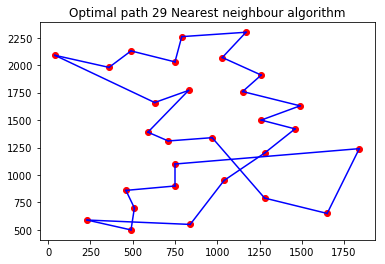

In [53]:
# complete the assignments
import matplotlib.pyplot as plt
plt.plot(coordinates29[:,0], coordinates29[:,1], 'ro')
plt.title('Optimal path 29 Nearest neighbour algorithm')
for k, v in path29NN.items():
    plt.plot([coordinates29[k,0], coordinates29[v,0]],[coordinates29[k,1], coordinates29[v,1]], 'b')  
plt.show()

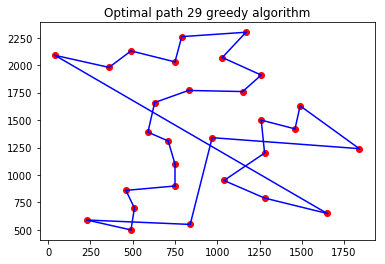

In [54]:
plt.plot(coordinates29[:,0], coordinates29[:,1], 'ro')
plt.title('Optimal path 29 greedy algorithm')
for k, v in path29gr.items():
    plt.plot([coordinates29[k,0], coordinates29[v,0]],[coordinates29[k,1], coordinates29[v,1]], 'b')  
plt.show()

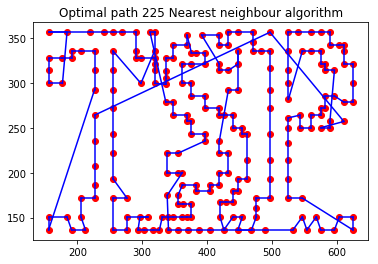

In [59]:
plt.plot(coordinates225[:,0], coordinates225[:,1], 'ro')
plt.title('Optimal path 225 Nearest neighbour algorithm')
for k, v in path225NN.items():
    plt.plot([coordinates225[k,0], coordinates225[v,0]],[coordinates225[k,1], coordinates225[v,1]], 'b')
plt.show()

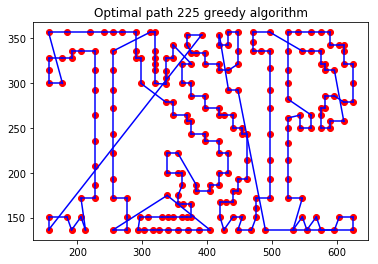

In [60]:
plt.plot(coordinates225[:,0], coordinates225[:,1], 'ro')
plt.title('Optimal path 225 greedy algorithm')
for k, v in path225gr.items():
    plt.plot([coordinates225[k,0], coordinates225[v,0]],[coordinates225[k,1], coordinates225[v,1]], 'b')
plt.show()

Allthough it looks like some edges have more than degree 2 (lower right), if we extract the keys and values of the path-dictionary, none of the nodes appears more than one time, meaning that there is exactly one edge coming in and one edge going out. 

In [64]:
for i in path225gr.keys():
    if list(path225gr.keys()).count(i)>1:
        print(i)
for i in path225gr.values():
    if list(path225gr.values()).count(i)>1:
        print(i)

        
for i in path225NN.keys():
    if list(path225NN.keys()).count(i)>1:
        print(i)
for i in path225NN.values():
    if list(path225NN.values()).count(i)>1:
        print(i)


Nothing is printed so none of the keys or values are found more than once. This means the path is actually a cycle with no cities visited more than once. The explanation could be that there are actually two nodes which are very close to each other on the graph. If we can't see the two nodes separatly, it looks as if there are 4 edges to one node, which are actually 2 edges for 2 nodes. 

If the weight of an edge corresponds to the distance between two edges, we can visualy score the path. If weight represents something else, this is not really possible. If the path does not zigzag too much, we could say that it is a good path. If the path jumps from one end to the other or zigzag a lot, the solution is probably not optimal. 